In [34]:
import zbar
import numpy as np
import cv2
from matplotlib import pyplot as plt

# create a reader
scanner = zbar.ImageScanner()

# configure the reader
scanner.parse_config('enable')

# obtain image data
im = cv2.imread('./qrcode.png')  
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  
width,height = gray_im.shape[:2] 

# wrap image data
image = zbar.Image(width, height, 'Y800', gray_im.tostring())

# scan the image for barcodes
scanner.scan(image)

# extract results
for symbol in image:
    # do something useful with results
    print 'decoded', symbol.type, 'symbol', '"%s"' % symbol.data
    corners = [item for item in symbol.location]
    print(corners)
    pts = np.array(corners, np.int32)
    pts = pts.reshape((-1,1,2))
    im = cv2.polylines(im,[pts],True,(255,0,0) , 10) 

decoded QRCODE symbol "ONIGIRI-WAR"
[(21, 21), (21, 478), (477, 476), (477, 21)]


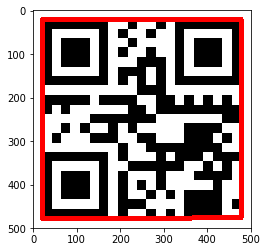

In [35]:
plt.imshow(im)
plt.show()